<a href="https://colab.research.google.com/github/Abdiirahim/ECGR-4105-Intro-to-ML/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

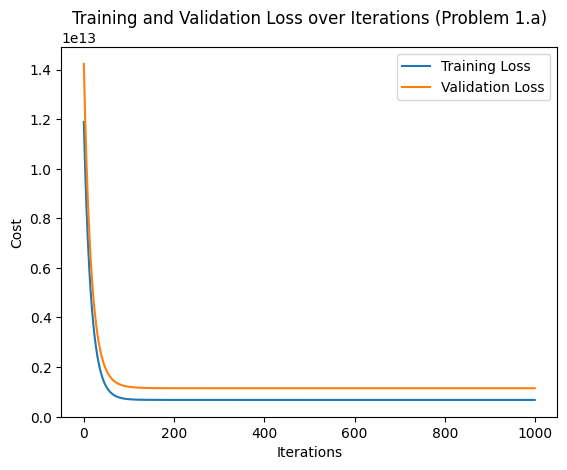

Final Parameters (Problem 1.a): [4744533.74764539  670284.85213657  111629.77893579  595794.1445517
  429496.17221722  290923.7607207 ]


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/HW2/Housing.csv'
data = pd.read_csv(file_path)
data.head()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Feature selection for 1.a (Area, bedrooms, bathrooms, stories, parking)
features = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
target = data['price']

# Normalize the features
def normalize_features(X):
    return (X - X.mean()) / X.std()

# Prepare the data
X = normalize_features(features).values
y = target.values

# Add a column of ones to X for the bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize theta (weights) to zero
theta = np.zeros(X_train.shape[1])

# Hypothesis function (linear regression model)
def hypothesis(X, theta):
    return np.dot(X, theta)

# Compute cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y) ** 2)

# Gradient Descent Algorithm
def gradient_descent(X, y, X_val, y_val, theta, alpha, iterations):
    m = len(y)
    cost_history_train = []
    cost_history_val = []

    for _ in range(iterations):
        theta -= (alpha / m) * np.dot(X.T, (hypothesis(X, theta) - y))
        cost_history_train.append(compute_cost(X, y, theta))
        cost_history_val.append(compute_cost(X_val, y_val, theta))  # Compute validation loss

    return theta, cost_history_train, cost_history_val

# Hyperparameters
alpha = 0.03  # Learning rate
iterations = 1000  # Number of iterations

# Train the model using gradient descent
theta, cost_history_train, cost_history_val = gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations)

# Plot the cost function over iterations (Training and Validation loss in a single graph with two lines)
plt.plot(range(iterations), cost_history_train, label='Training Loss')
plt.plot(range(iterations), cost_history_val, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss over Iterations (Problem 1.a)')
plt.legend()
plt.show()

# Output the final theta (parameters)
print("Final Parameters (Problem 1.a):", theta)




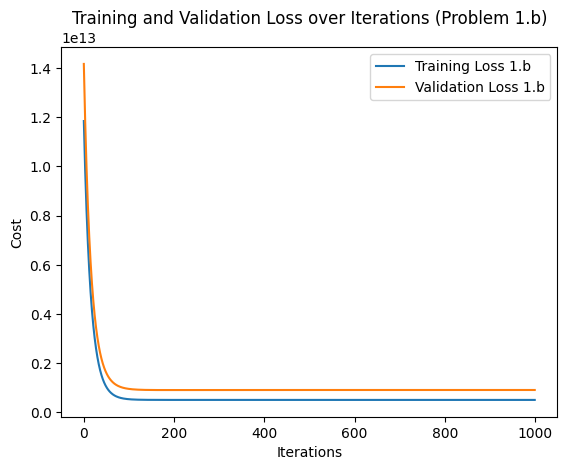

Final Parameters for 1.b: [4741436.23490171  515864.9682071    57926.44299725  557402.85078684
  370339.92834663  143874.03862123   93264.79774406  207737.03235415
  149147.39835038  376058.98307566  213193.39236965  270190.49520021]


In [ ]:
# Feature selection for 1.b (adding more features)
features_1b = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]

# Convert non-numeric features to numeric representations
features_1b = features_1b.replace({'yes': 1, 'no': 0}) # Replace 'yes' with 1 and 'no' with 0

# Normalize the features
X_1b = normalize_features(features_1b).values

# Add the intercept term
X_1b = np.c_[np.ones(X_1b.shape[0]), X_1b]

# Split the data into training and validation sets
X_train_1b, X_val_1b, y_train_1b, y_val_1b = train_test_split(X_1b, y, test_size=0.2, random_state=42)

# Initialize theta for 1.b
theta_1b = np.zeros(X_train_1b.shape[1])

# Train the model using gradient descent
theta_1b, cost_history_train_1b, cost_history_val_1b = gradient_descent(X_train_1b, y_train_1b, X_val_1b, y_val_1b, theta_1b, alpha, iterations)

# Plot the cost function over iterations (Training and Validation loss in a single graph with two lines)
plt.plot(range(iterations), cost_history_train_1b, label='Training Loss 1.b')
plt.plot(range(iterations), cost_history_val_1b, label='Validation Loss 1.b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss over Iterations (Problem 1.b)')
plt.legend()
plt.show()

# Output the final theta (parameters)
print("Final Parameters for 1.b:", theta_1b)


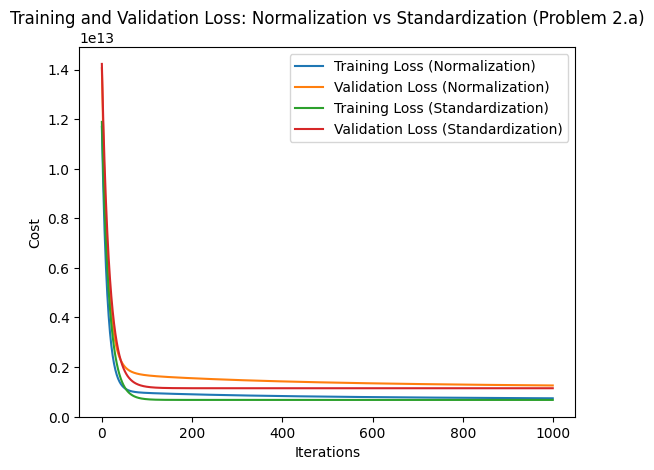

Final Parameters for Normalized 2.a: [2592517.61822269 2583174.55235088 1438330.56298223 2052774.50341065
 1614728.23276501 1470955.15607116]
Final Parameters for Standardized 2.a: [4744533.74764539  670284.85213657  111629.77893579  595794.1445517
  429496.17221722  290923.7607207 ]


In [ ]:
# Normalize features
X_1a_normalized = normalize_features(features_1a).values
X_1a_standardized = standardize_features(features_1a).values

# Add the intercept term
X_1a_normalized = np.c_[np.ones(X_1a_normalized.shape[0]), X_1a_normalized]
X_1a_standardized = np.c_[np.ones(X_1a_standardized.shape[0]), X_1a_standardized]

# Split the data for normalization
X_train_norm_1a, X_val_norm_1a, y_train_norm_1a, y_val_norm_1a = train_test_split(X_1a_normalized, y, test_size=0.2, random_state=42)

# Split the data for standardization
X_train_std_1a, X_val_std_1a, y_train_std_1a, y_val_std_1a = train_test_split(X_1a_standardized, y, test_size=0.2, random_state=42)

# Initialize theta
theta_norm_1a = np.zeros(X_train_norm_1a.shape[1])
theta_std_1a = np.zeros(X_train_std_1a.shape[1])

# Train the model using gradient descent with normalized data
theta_norm_1a, cost_history_train_norm_1a, cost_history_val_norm_1a = gradient_descent(X_train_norm_1a, y_train_norm_1a, X_val_norm_1a, y_val_norm_1a, theta_norm_1a, alpha, iterations)

# Train the model using gradient descent with standardized data
theta_std_1a, cost_history_train_std_1a, cost_history_val_std_1a = gradient_descent(X_train_std_1a, y_train_std_1a, X_val_std_1a, y_val_std_1a, theta_std_1a, alpha, iterations)

# Plot both normalization and standardization training losses in the same graph
plt.plot(range(iterations), cost_history_train_norm_1a, label='Training Loss (Normalization)')
plt.plot(range(iterations), cost_history_val_norm_1a, label='Validation Loss (Normalization)')
plt.plot(range(iterations), cost_history_train_std_1a, label='Training Loss (Standardization)')
plt.plot(range(iterations), cost_history_val_std_1a, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss: Normalization vs Standardization (Problem 2.a)')
plt.legend()
plt.show()

# Output the final theta (parameters)
print("Final Parameters for Normalized 2.a:", theta_norm_1a)
print("Final Parameters for Standardized 2.a:", theta_std_1a)


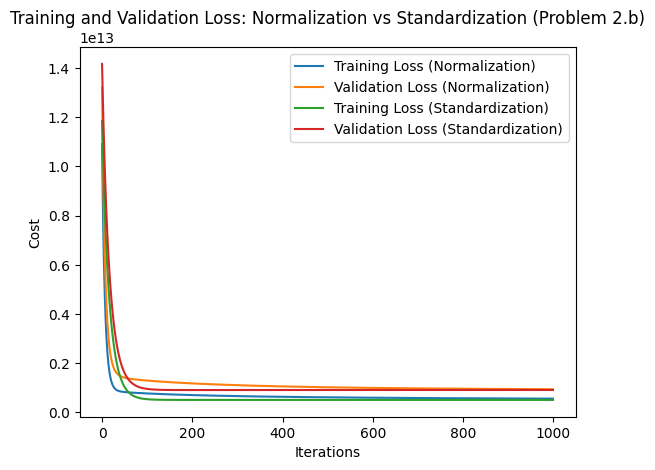

Final Parameters for Normalized 2.b: [1860237.89557848 1821725.9976172  1123300.3595822  1851455.22508541
 1301815.68611924  634364.96159425  358250.81663099  410696.67337187
  640951.30019278  922028.04653103 1056205.89920216  651130.13250584]
Final Parameters for Standardized 2.b: [4741436.23490171  515864.9682071    57926.44299725  557402.85078684
  370339.92834663  143874.03862123   93264.79774406  207737.03235415
  149147.39835038  376058.98307566  213193.39236965  270190.49520021]


In [ ]:
# Feature selection for 2.b (extended feature set used in 1.b)
features_2b = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
target = data['price']

# Convert non-numeric features to numeric representations
features_2b = features_2b.replace({'yes': 1, 'no': 0}) # Replace 'yes' with 1 and 'no' with 0

# Normalize and standardize the features
X_2b_normalized = normalize_features(features_2b).values
X_2b_standardized = standardize_features(features_2b).values
y = target.values

# Add the intercept term (bias) for both normalization and standardization
X_2b_normalized = np.c_[np.ones(X_2b_normalized.shape[0]), X_2b_normalized]
X_2b_standardized = np.c_[np.ones(X_2b_standardized.shape[0]), X_2b_standardized]

# Split the data into training (80%) and validation (20%) sets for both normalization and standardization
X_train_norm_2b, X_val_norm_2b, y_train_norm_2b, y_val_norm_2b = train_test_split(X_2b_normalized, y, test_size=0.2, random_state=42)
X_train_std_2b, X_val_std_2b, y_train_std_2b, y_val_std_2b = train_test_split(X_2b_standardized, y, test_size=0.2, random_state=42)

# Initialize theta (weights) for both normalization and standardization
theta_norm_2b = np.zeros(X_train_norm_2b.shape[1])
theta_std_2b = np.zeros(X_train_std_2b.shape[1])

# Train the model using gradient descent with normalized data
theta_norm_2b, cost_history_train_norm_2b, cost_history_val_norm_2b = gradient_descent(X_train_norm_2b, y_train_norm_2b, X_val_norm_2b, y_val_norm_2b, theta_norm_2b, alpha, iterations)

# Train the model using gradient descent with standardized data
theta_std_2b, cost_history_train_std_2b, cost_history_val_std_2b = gradient_descent(X_train_std_2b, y_train_std_2b, X_val_std_2b, y_val_std_2b, theta_std_2b, alpha, iterations)

# Plot both normalization and standardization training losses in the same graph
plt.plot(range(iterations), cost_history_train_norm_2b, label='Training Loss (Normalization)')
plt.plot(range(iterations), cost_history_val_norm_2b, label='Validation Loss (Normalization)')
plt.plot(range(iterations), cost_history_train_std_2b, label='Training Loss (Standardization)')
plt.plot(range(iterations), cost_history_val_std_2b, label='Validation Loss (Standardization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss: Normalization vs Standardization (Problem 2.b)')
plt.legend()
plt.show()

# Output the final theta (parameters)
print("Final Parameters for Normalized 2.b:", theta_norm_2b)
print("Final Parameters for Standardized 2.b:", theta_std_2b)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

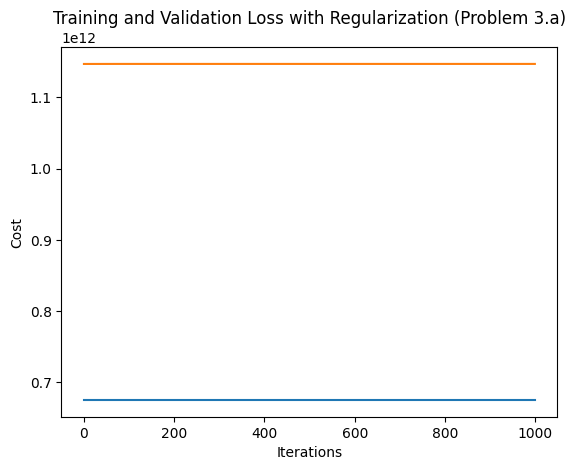

In [ ]:
# Regularized cost function
def compute_cost_with_penalty(X, y, theta, lambda_):
    m = len(y)
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))  # Regularization excludes bias
    return (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y) ** 2) + regularization_term

# Modify gradient descent to include the penalty term
def gradient_descent_with_penalty(X, y, X_val, y_val, theta, alpha, iterations, lambda_):
    m = len(y)
    cost_history_train = []
    cost_history_val = []

    for _ in range(iterations):
        # Apply regularization only to the non-intercept terms
        gradient = np.dot(X.T, (hypothesis(X, theta) - y)) / m
        gradient[1:] += (lambda_ / m) * theta[1:]
        theta -= alpha * gradient
        cost_history_train.append(compute_cost_with_penalty(X, y, theta, lambda_))
        cost_history_val.append(compute_cost_with_penalty(X_val, y_val, theta, lambda_))  # Validation loss

    return theta, cost_history_train, cost_history_val

# Set regularization parameter (lambda)
lambda_ = 0.1

# Train the model using gradient descent with regularization
theta_reg_1a, cost_history_train_reg_1a, cost_history_val_reg_1a = gradient_descent_with_penalty(X_train_1a, y_train_1a, X_val_1a, y_val_1a, theta_1a, alpha, iterations, lambda_)

# Plot the regularized cost function for both training and validation loss
plt.plot(range(iterations), cost_history_train_reg_1a, label='Training Loss (Regularized)')
plt.plot(range(iterations), cost_history_val_reg_1a, label='Validation Loss (Regularized)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss with Regularization (Problem 3.a)')
plt


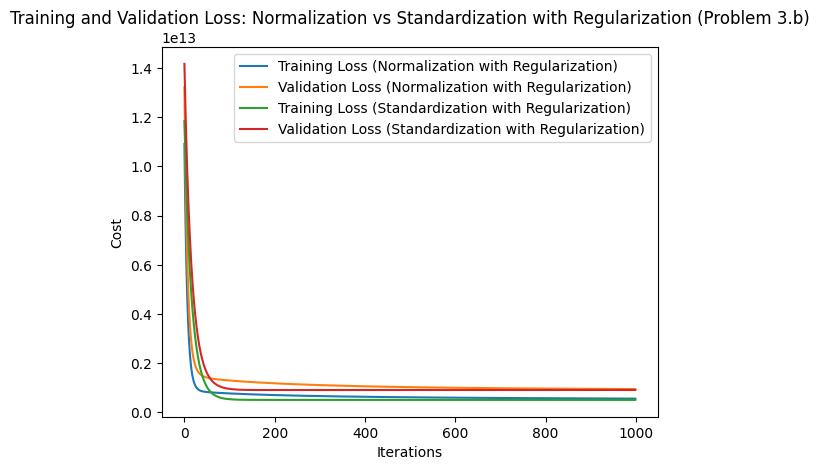

Final Parameters for Normalized 3.b (with Regularization): [1863779.45475039 1816756.34471154 1120289.84349097 1846790.69827818
 1300014.7505841   634411.08185253  358446.85120807  410488.82447499
  639321.00908352  922265.26953928 1055019.7810438   650855.37995773]


In [ ]:
# Feature selection for 3.b (same as 2.b)
features_3b = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                    'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
target = data['price']

# Convert non-numeric features to numeric representations
features_3b = features_3b.replace({'yes': 1, 'no': 0}) # Replace 'yes' with 1 and 'no' with 0

# Normalize and standardize the features
X_3b_normalized = normalize_features(features_3b).values
X_3b_standardized = standardize_features(features_3b).values
y = target.values

# Add the intercept term for both normalization and standardization
X_3b_normalized = np.c_[np.ones(X_3b_normalized.shape[0]), X_3b_normalized]
X_3b_standardized = np.c_[np.ones(X_3b_standardized.shape[0]), X_3b_standardized]

# Split the data into training and validation sets for normalization and standardization
X_train_norm_3b, X_val_norm_3b, y_train_norm_3b, y_val_norm_3b = train_test_split(X_3b_normalized, y, test_size=0.2, random_state=42)
X_train_std_3b, X_val_std_3b, y_train_std_3b, y_val_std_3b = train_test_split(X_3b_standardized, y, test_size=0.2, random_state=42)

# Initialize theta for both normalization and standardization
theta_norm_3b = np.zeros(X_train_norm_3b.shape[1])
theta_std_3b = np.zeros(X_train_std_3b.shape[1])

# Set regularization parameter (lambda)
lambda_ = 0.1

# Train the model with regularization for normalized data
theta_norm_3b, cost_history_train_norm_3b, cost_history_val_norm_3b = gradient_descent_with_penalty(X_train_norm_3b, y_train_norm_3b, X_val_norm_3b, y_val_norm_3b, theta_norm_3b, alpha, iterations, lambda_)

# Train the model with regularization for standardized data
theta_std_3b, cost_history_train_std_3b, cost_history_val_std_3b = gradient_descent_with_penalty(X_train_std_3b, y_train_std_3b, X_val_std_3b, y_val_std_3b, theta_std_3b, alpha, iterations, lambda_)

# Plot both normalization and standardization training losses with regularization
plt.plot(range(iterations), cost_history_train_norm_3b, label='Training Loss (Normalization with Regularization)')
plt.plot(range(iterations), cost_history_val_norm_3b, label='Validation Loss (Normalization with Regularization)')
plt.plot(range(iterations), cost_history_train_std_3b, label='Training Loss (Standardization with Regularization)')
plt.plot(range(iterations), cost_history_val_std_3b, label='Validation Loss (Standardization with Regularization)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Loss: Normalization vs Standardization with Regularization (Problem 3.b)')
plt.legend()
plt.show()

# Output the final theta (parameters) for both normalized and standardized models with regularization
print("Final Parameters for Normalized 3.b (with Regularization):", theta_norm_3b)
